In [1]:
from virgo.cluster import VirgoCluster
from virgo.kernel import VirgoKernel, VirgoSimpleKernel
from virgo.mixture import VirgoMixture, VirgoClustering
from virgo.cleaner import LowDensityCleaner

%load_ext autoreload
%autoreload 2

%matplotlib notebook

Reading  1291820  particles
Data set 0 - Shape: (1021237, 9)
Mean / Std: 71680.514 / 237008.514
Min / Max: -19593.020 / 1291819.000
Data set 1 - Shape: (1021237, 8)
Mean / Std: 0.000 / 1.000
Min / Max: -5.064 / 16.106


<IPython.core.display.Javascript object>


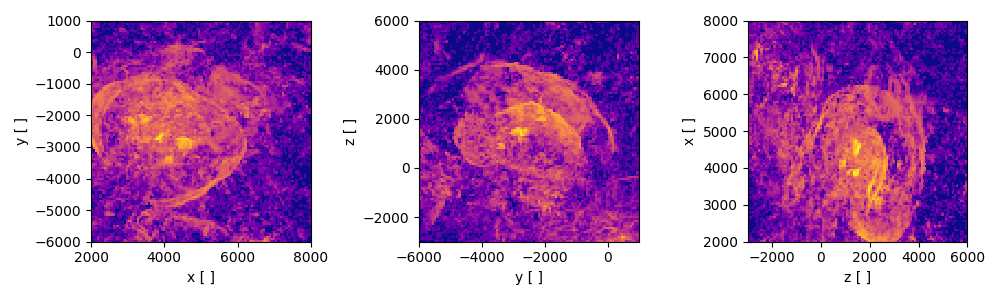

In [2]:
snap_id = 820
filebase = f"/home/max/Software/virgo/data/VIRGO/snap_{snap_id}"
virgo_cluster = VirgoCluster(
    file_name=filebase, io_mode=1, cut_mach_dim=-2, # n_max_data=100000, 
)
# virgo_cluster.data = virgo_cluster.data[:, :-1]

virgo_cluster.scale_data()
virgo_cluster.print_datastats()
virgo_cluster.plot_raw_hists(
    bins=100, plot_range=[[2000., 8000.], [-6000., 1000.], [-3000., 6000.]]
)

In [3]:
virgo_kernel = VirgoKernel(virgo_cluster, k_nystroem=100, pca_comp=5)
virgo_kernel()
virgo_cluster.print_datastats()

Data set 0 - Shape: (1021237, 9)
Mean / Std: 71680.514 / 237008.514
Min / Max: -19593.020 / 1291819.000
Data set 1 - Shape: (1021237, 5)
Mean / Std: 0.000 / 0.238
Min / Max: -0.525 / 0.859


ELBO: 3.2791597237153143
Mixture weights [0.55122233 0.44877767]
(array([0, 1]), array([563675, 457562]))


<IPython.core.display.Javascript object>


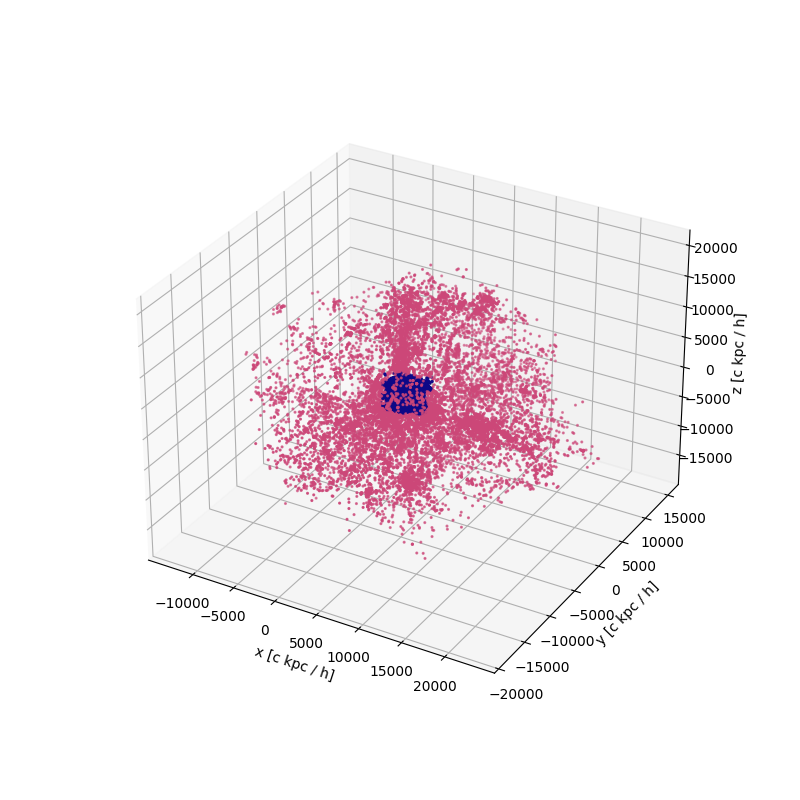

In [4]:
virgo_mixture = VirgoMixture(virgo_cluster, n_comp=2)
elbo = virgo_mixture.fit()

print(f"ELBO: {elbo}")
print(f"Mixture weights {virgo_mixture.model.weights_}")

virgo_mixture.predict(remove_uncertain_labels=False)
labels_removed = virgo_cluster.get_labels(return_counts=True)
print(labels_removed)

virgo_cluster.cluster_labels[virgo_cluster.cluster_labels == 1] = 2
# virgo_cluster.cluster_labels[virgo_cluster.cluster_labels == 1][0:100] = 4

# virgo_cluster.plot_cluster(cmap_vmax=4, n_step=25, plot_kernel_space=True, store_gif=False, gif_title="nystroem_separation_kernelspace")
virgo_cluster.plot_cluster(cmap_vmax=4, n_step=25, store_gif=False, gif_title="nystroem_separation_kernelspace")

Cluster 0
Density: 1.293844171327707e-10
Cluster 2
Density: 8.642010405615583e-14
(array([-1,  0]), array([457562, 563675]))


/home/max/Software/virgo/virgo/cleaner.py:41: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.clusters = np.array(self.clusters)
/home/max/Software/virgo/virgo/cleaner.py:42: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.labels = np.array(self.labels)


<IPython.core.display.Javascript object>


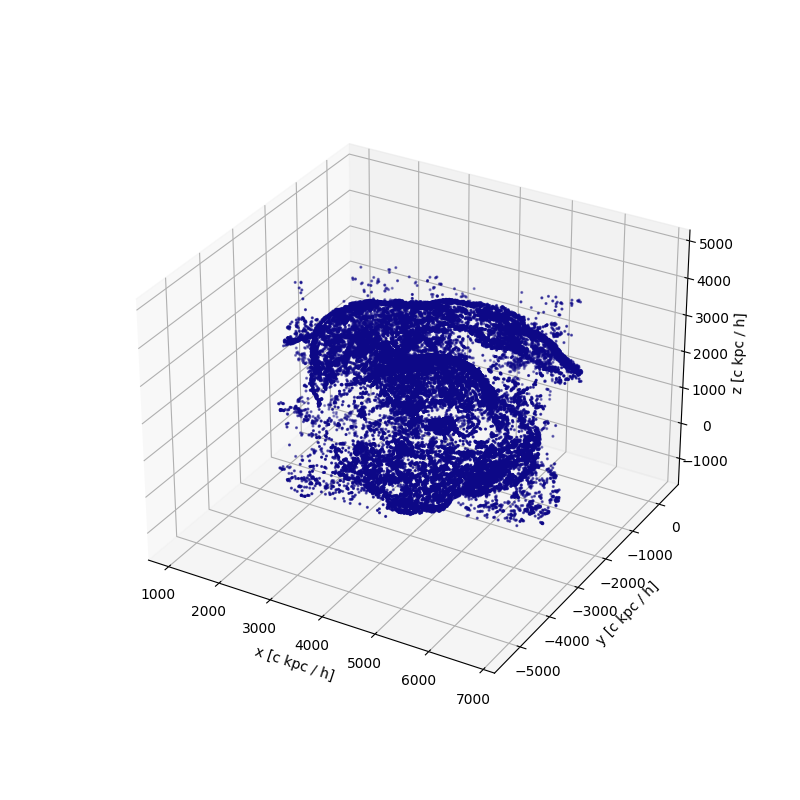

In [5]:
d_cleaner = LowDensityCleaner(virgo_cluster, 1e-11)
d_cleaner.clean()
print(virgo_cluster.get_labels(return_counts=True))
virgo_cluster.plot_cluster(n_step=10)

In [6]:
# vc_2 = VirgoCluster(file_name=None)
# vc_2.data = virgo_cluster.cluster[virgo_cluster.cluster_labels >=0][::20]
# vc_2.data[:, [0, 1, 2]] = vc_2.data[:, [0, 1, 2]] / vc_2.data.T[-1].reshape(vc_2.data.shape[0], 1)
# vc_2.scale_data()
# vc_2.data = virgo_cluster.cluster[virgo_cluster.cluster_labels >=0][::20]
# vc_2.print_datastats()

vc_2 = VirgoCluster(file_name=None)
vc_2.data = virgo_cluster.cluster[virgo_cluster.cluster_labels >=0][::10]
vc_2.scale_data()
vc_2.print_datastats()

Data set 0 - Shape: (56368, 9)
Mean / Std: 69101.047 / 230795.870
Min / Max: -5428.700 / 1291693.000
Data set 1 - Shape: (56368, 8)
Mean / Std: 0.000 / 1.000
Min / Max: -3.239 / 13.363


In [7]:
virgo_kernel = VirgoKernel(
    vc_2, k_nystroem=600, pca_comp=6, spatial_dim=[0, 1, 2, 3, 4, 5]
)
# virgo_kernel()

# Matern(spat) * Linear(spat) + 2 * Matern(spat) * Linear(norms)
# Matern(spat) * Linear(spat) * Linear(norms)

virgo_kernel(virgo_kernel.custom_kernel)
vc_2.print_datastats()

Data set 0 - Shape: (56368, 9)
Mean / Std: 69101.047 / 230795.870
Min / Max: -5428.700 / 1291693.000
Data set 1 - Shape: (56368, 6)
Mean / Std: -0.000 / 0.761
Min / Max: -1.708 / 2.292


Found  5099  groups
[-1  0  1  2  3  4  5  6] [13234 15824 13439  4673  3879  2588  1690  1041]


<IPython.core.display.Javascript object>


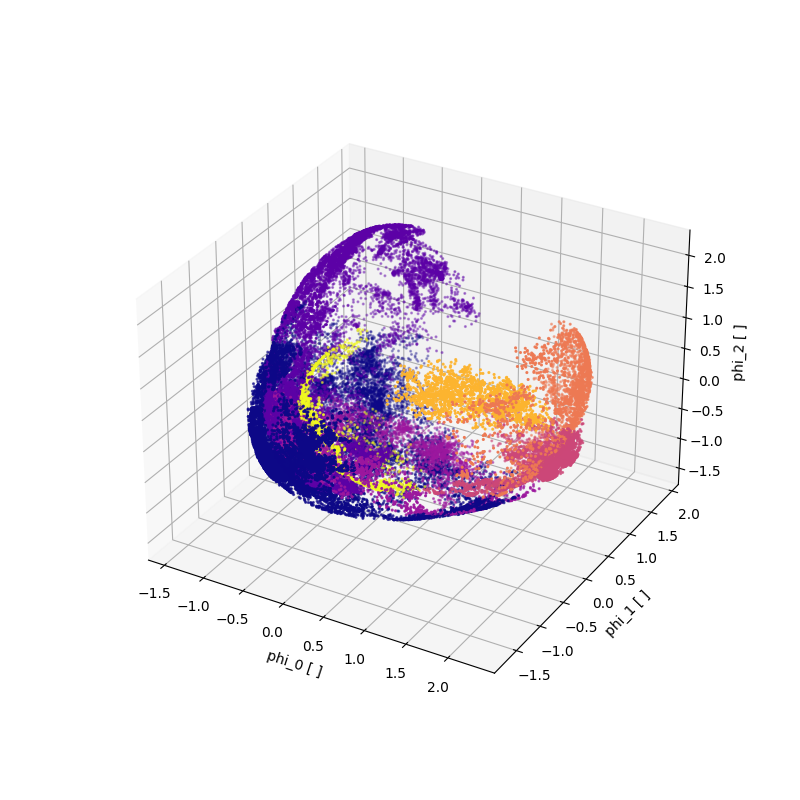

<IPython.core.display.Javascript object>


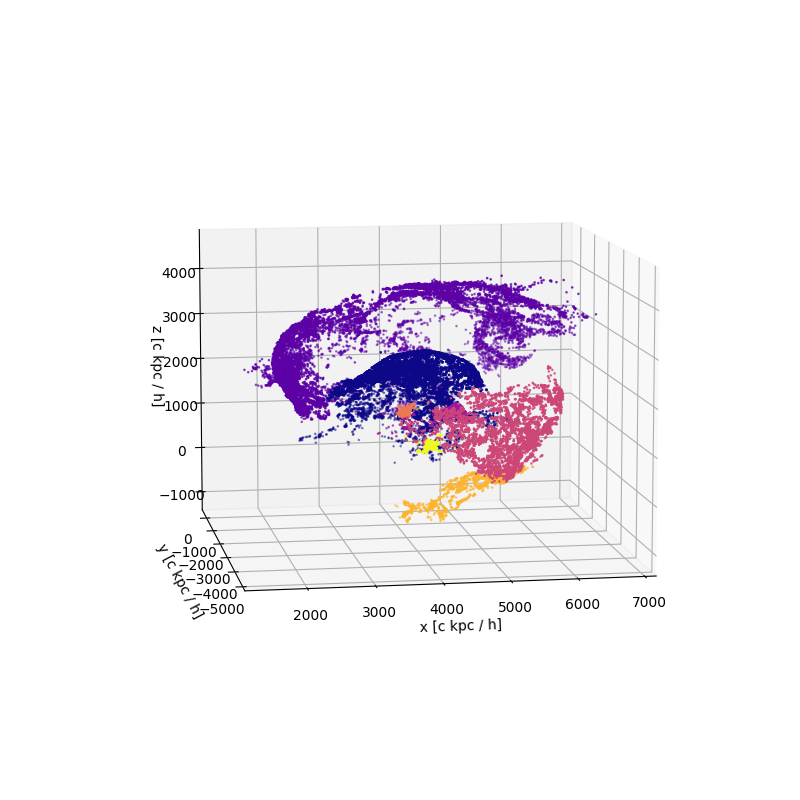

In [17]:
ll = {
    "750": 0.101,
    "760": 0.14,
    "770": 0.24,
    "780": 0.190,
    "790": 0.125,
    "800": 0.115,
    "810": 0.130,
    "820": 0.13,
}
vc_2.run_fof(
    linking_length=ll[f"{snap_id}"],
    min_group_size=700,
    use_scaled_data=True,
)

labels, counts = vc_2.get_labels(return_counts=True)
print(labels, counts)
vc_2.plot_cluster(n_step=1, plot_kernel_space=True)
vc_2.plot_cluster(n_step=1, maker_size=3.0)
# vc_2.plot_cluster(n_step=1, remove_uncertain=False)

<IPython.core.display.Javascript object>


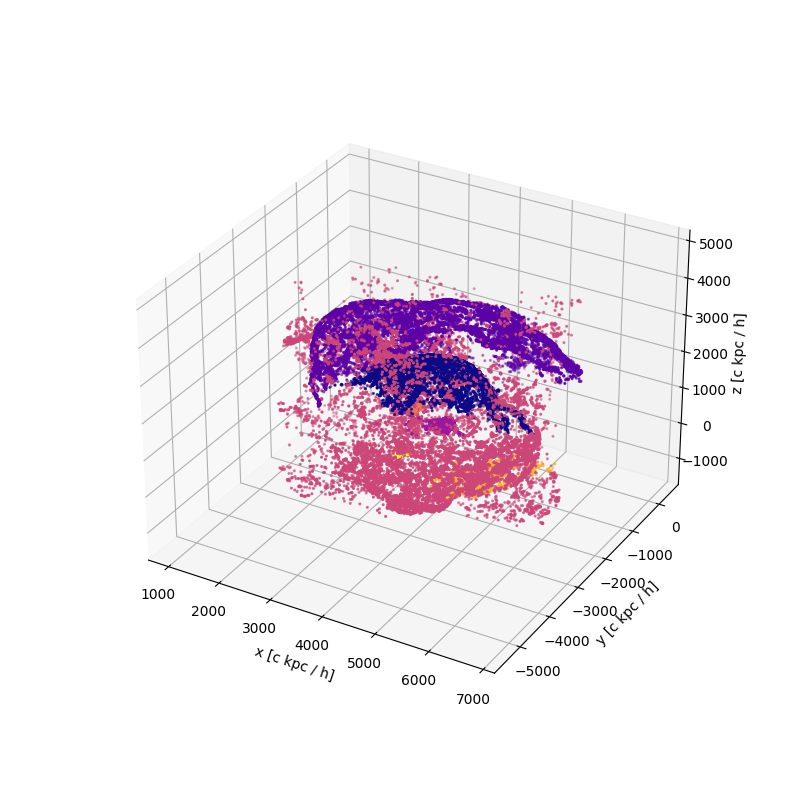

In [13]:
# labels, counts = vc_2.get_labels(return_counts=True)
# vc_2.cluster_labels[vc_2.cluster_labels <0] = labels.shape[0]
# vc_2.plot_cluster(n_step=1)

In [10]:
# vc_2.export_cluster("vc_methodD_830", remove_uncertain=False, remove_evno=True)

In [11]:
# virgo_mixture = VirgoMixture(vc_2, n_comp=6)
# elbo = virgo_mixture.fit()

# print(f"ELBO: {elbo}")
# print(f"Mixture weights {virgo_mixture.model.weights_}")

# virgo_mixture.predict(remove_uncertain_labels=False)
# labels_removed = vc_2.get_labels(return_counts=True)
# print(labels_removed)

# vc_2.plot_cluster(n_step=2, plot_kernel_space=True, store_gif=False, gif_title="nystroem_separation_kernelspace")
# vc_2.plot_cluster(n_step=2, store_gif=False, gif_title="nystroem_separation_kernelspace")

In [12]:
# virgo_clustering = VirgoClustering(vc_2, min_samples=10, eps=0.12, clustering_type="dbscan") # 0.03
# # virgo_clustering = VirgoClustering(vc_2, min_samples=10, eps=0.0525, clustering_type="dbscan")
# # virgo_clustering = VirgoClustering(vc_2, min_samples=10, eps=0.0525, clustering_type="dbscan")
# virgo_clustering.predict()
# vc_2.remove_small_groups(remove_thresh=200)
# vc_2.sort_labels()
# labels_removed = vc_2.get_labels(return_counts=True)
# print(labels_removed)

# vc_2.plot_cluster(n_step=1, plot_kernel_space=True)
# vc_2.plot_cluster(n_step=1)